In [1]:
import os

In [2]:
current_path = os.getcwd()

In [3]:
penguins_path = current_path+'/penguins.csv'

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(penguins_path)

In [6]:
df.head() 
df.shape 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
184,Chinstrap,Dream,42.5,16.7,187.0,3350.0,FEMALE
32,Adelie,Dream,39.5,17.8,188.0,3300.0,FEMALE
119,Adelie,Torgersen,41.1,18.6,189.0,3325.0,MALE
48,Adelie,Dream,36.0,17.9,190.0,3450.0,FEMALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,MALE
161,Chinstrap,Dream,51.3,19.9,198.0,3700.0,MALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE


In [8]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [9]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [10]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
df.groupby(['species','island']).count()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   island                                                            
Adelie    Biscoe                   44               44                 44   
          Dream                    56               56                 56   
          Torgersen                51               51                 51   
Chinstrap Dream                    68               68                 68   
Gentoo    Biscoe                  123              123                123   

                     body_mass_g  sex  
species   island                       
Adelie    Biscoe              44   44  
          Dream               56   55  
          Torgersen           51   47  
Chinstrap Dream               68   68  
Gentoo    Biscoe             123  120

In [13]:
# lets remove the null values for now
df = df.dropna()
df.groupby(['species','island']).count()['sex']

species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       120
Name: sex, dtype: int64

In [14]:
df['sex'] = df['sex'].map(lambda x: 1 if x == 'MALE' else 0)

In [15]:
adelie = df[df['species'] == 'Adelie'].describe()
chinstrap = df[df['species'] == 'Chinstrap'].describe()
gentoo = df[df['species'] == 'Gentoo'].describe()

In [16]:
adelie.loc['range'] = adelie.loc['max'] - adelie.loc['min']
adelie

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384,0.500000
std,2.662597,1.219338,6.521825,458.620135,0.501721
min,32.100000,15.500000,172.000000,2850.000000,0.000000
25%,36.725000,17.500000,186.000000,3362.500000,0.000000
50%,38.850000,18.400000,190.000000,3700.000000,0.500000
75%,40.775000,19.000000,195.000000,4000.000000,1.000000
max,46.000000,21.500000,210.000000,4775.000000,1.000000
range,13.900000,6.000000,38.000000,1925.000000,1.000000


In [17]:
chinstrap.loc['range'] = chinstrap.loc['max'] - chinstrap.loc['min']
chinstrap

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235,0.500000
std,3.339256,1.135395,7.131894,384.335081,0.503718
min,40.900000,16.400000,178.000000,2700.000000,0.000000
25%,46.350000,17.500000,191.000000,3487.500000,0.000000
50%,49.550000,18.450000,196.000000,3700.000000,0.500000
75%,51.075000,19.400000,201.000000,3950.000000,1.000000
max,58.000000,20.800000,212.000000,4800.000000,1.000000
range,17.100000,4.400000,34.000000,2100.000000,1.000000


In [18]:
gentoo.loc['range'] = gentoo.loc['max'] - gentoo.loc['min']
gentoo

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,47.542500,15.002500,217.233333,5090.625000,0.508333
std,3.105692,0.983944,6.557738,499.759002,0.502027
min,40.900000,13.100000,203.000000,3950.000000,0.000000
25%,45.300000,14.200000,212.000000,4700.000000,0.000000
50%,47.350000,15.000000,216.000000,5050.000000,1.000000
75%,49.600000,15.725000,221.250000,5500.000000,1.000000
max,59.600000,17.300000,231.000000,6300.000000,1.000000
range,18.700000,4.200000,28.000000,2350.000000,1.000000


In [19]:
df.groupby(['species','island','sex']).count()['body_mass_g'] # pretty balanced by sex

species    island     sex
Adelie     Biscoe     0      22
                      1      22
           Dream      0      27
                      1      28
           Torgersen  0      24
                      1      23
Chinstrap  Dream      0      34
                      1      34
Gentoo     Biscoe     0      59
                      1      61
Name: body_mass_g, dtype: int64

In [20]:
df.groupby(['species','island']).sum()['body_mass_g'] # pretty balanced by sex

species    island   
Adelie     Biscoe       163225.0
           Dream        203575.0
           Torgersen    174300.0
Chinstrap  Dream        253850.0
Gentoo     Biscoe       610875.0
Name: body_mass_g, dtype: float64

In [21]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066,0.343270
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987,0.374043
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211,0.250833
body_mass_g,0.589066,-0.472987,0.873211,1.000000,0.421400
sex,0.343270,0.374043,0.250833,0.421400,1.000000


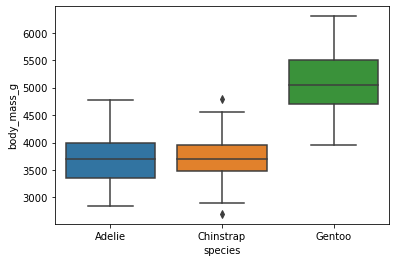

In [22]:
# visuals
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.boxplot(data=df, x='species', y='body_mass_g')

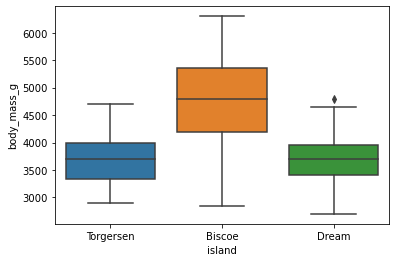

In [23]:
_ = sns.boxplot(data=df, x='island', y='body_mass_g')

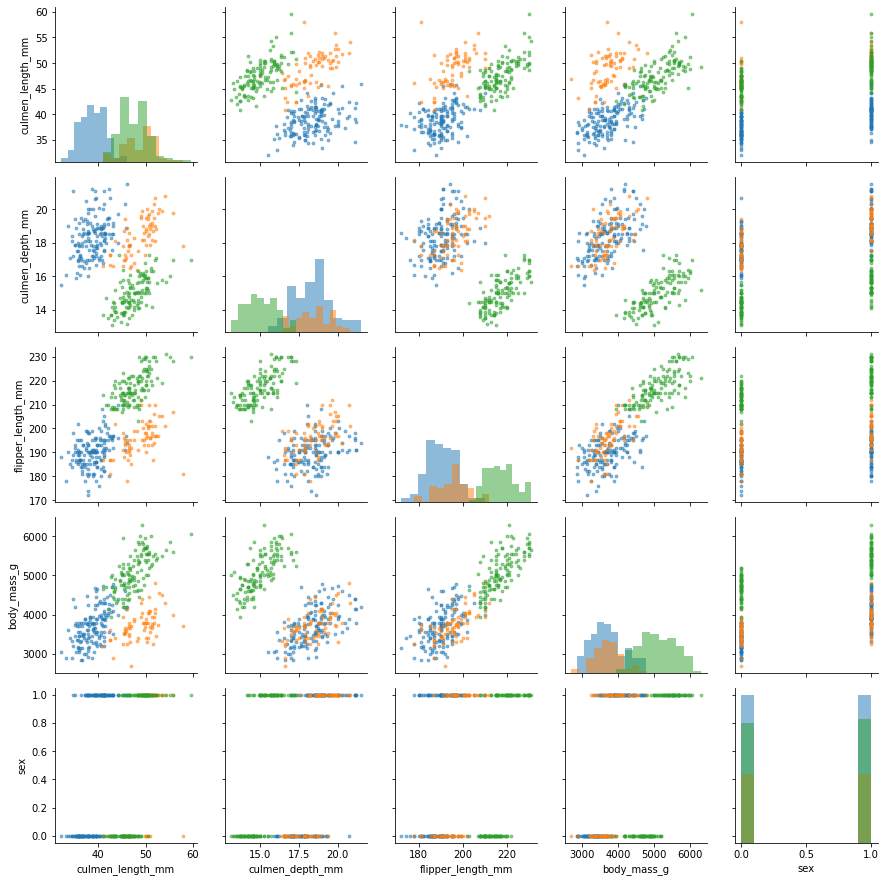

In [24]:
# x-axis species; y-axis weight
pair = sns.PairGrid(data=df, hue='species')
pair.map_upper(plt.scatter, s=8, alpha=.5)
pair.map_diag(plt.hist, alpha=.5)
pair.map_lower(plt.scatter, s=8, alpha=.5)

# as expected, many of the lengths are correlated

In [25]:
# get_dummies 
df['species_orignal'] = df['species']
df['island_original'] = df['island']

In [26]:
df_dummies = pd.get_dummies(df, columns=['species'], prefix=["species_is"], drop_first=True)

In [27]:
df_dummies = pd.get_dummies(df_dummies, columns=['island'], prefix=["island_is"], drop_first=True)

In [28]:
df_dummies

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_orignal,island_original,species_is_Chinstrap,species_is_Gentoo,island_is_Dream,island_is_Torgersen
0,39.1,18.7,181.0,3750.0,1,Adelie,Torgersen,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,Adelie,Torgersen,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,Adelie,Torgersen,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,Adelie,Torgersen,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,Adelie,Torgersen,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,Gentoo,Biscoe,0,1,0,0
340,46.8,14.3,215.0,4850.0,0,Gentoo,Biscoe,0,1,0,0
341,50.4,15.7,222.0,5750.0,1,Gentoo,Biscoe,0,1,0,0
342,45.2,14.8,212.0,5200.0,0,Gentoo,Biscoe,0,1,0,0


In [29]:
#list(df_dummies.columns)

In [30]:
df_dummies = df_dummies[['species_orignal','island_original','culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'species_is_Chinstrap',
 'species_is_Gentoo',
 'island_is_Dream',
 'island_is_Torgersen']]

In [31]:
df_dummies

,species_orignal,island_original,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_is_Chinstrap,species_is_Gentoo,island_is_Dream,island_is_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0,0,1,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0,0,1,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1,0,1,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0,0,1,0,0


In [ ]:
# next step is normalize the the continuous variables 
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [32]:
# X = df.iloc[:,1:]
# y = df['species']